170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 - 40s - 64ms/step - accuracy: 0.4356 - loss: 2.2435 - val_accuracy: 0.4884 - val_loss: 2.0144 - learning_rate: 1.0000e-03
Epoch 2/10
625/625 - 27s - 43ms/step - accuracy: 0.5806 - loss: 1.6379 - val_accuracy: 0.5494 - val_loss: 1.7126 - learning_rate: 1.0000e-03
Epoch 3/10
625/625 - 41s - 66ms/step - accuracy: 0.6362 - loss: 1.4078 - val_accuracy: 0.5358 - val_loss: 1.9014 - learning_rate: 1.0000e-03
Epoch 4/10
625/625 - 26s - 42ms/step - accuracy: 0.6622 - loss: 1.3667 - val_accuracy: 0.6963 - val_loss: 1.3001 - learning_rate: 1.0000e-03
Epoch 5/10
625/625 - 27s - 42ms/step - accuracy: 0.6844 - loss: 1.3397 - val_accuracy: 0.6752 - val_loss: 1.3746 - learning_rate: 1.0000e-03
Epoch 6/10
625/625 - 41s - 66ms/step - accuracy: 0.7056 - loss: 1.3159 - val_accuracy: 0.6663 - val_loss: 1.4602 - learning_rate: 1.0000e-03
Epoch 7/10

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 - 41s - 66ms/step - accuracy: 0.7190 - loss: 1.3054 - val_accuracy: 0

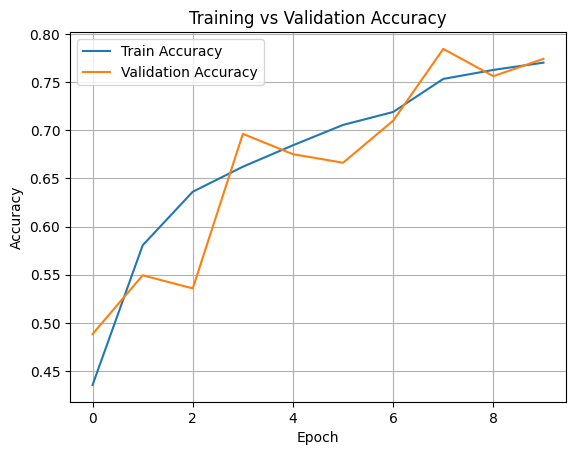

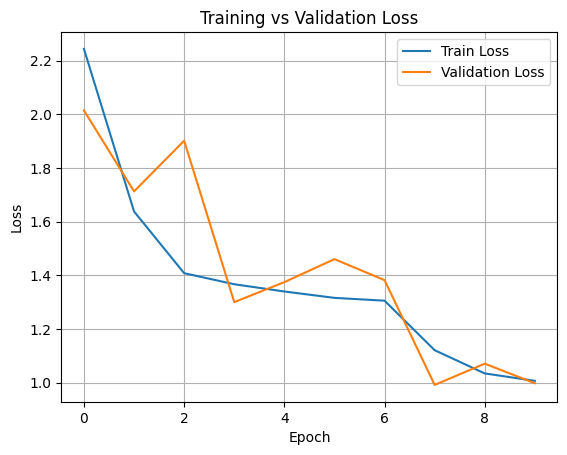

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


x_train_sub, x_val_sub, y_train_sub, y_val_sub = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_sub)


model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.35),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


history = model.fit(
    datagen.flow(x_train_sub, y_train_sub, batch_size=64),
    validation_data=(x_val_sub, y_val_sub),
    epochs=10,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
